In [1]:
%matplotlib inline

import sys
import pickle
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils3D import *
from graph import *
from points_generation3D import *
from initial_guess3D import *
from variational3D import *
from gmr import *

In [3]:
elm = pickle.load( open('../results/elm-1000C-halton2-standard.pkl', 'rb'))


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:

success: False

status: 5

message: Number of calls to function has reached maxfev = 100000.

nfev: 100025
Residual RMS: 0.291081260409
Residual Variance: 0.000659798385188
Residual Entropy: 6.6460617447
Total elapsed time: 10239.9802489 [s]


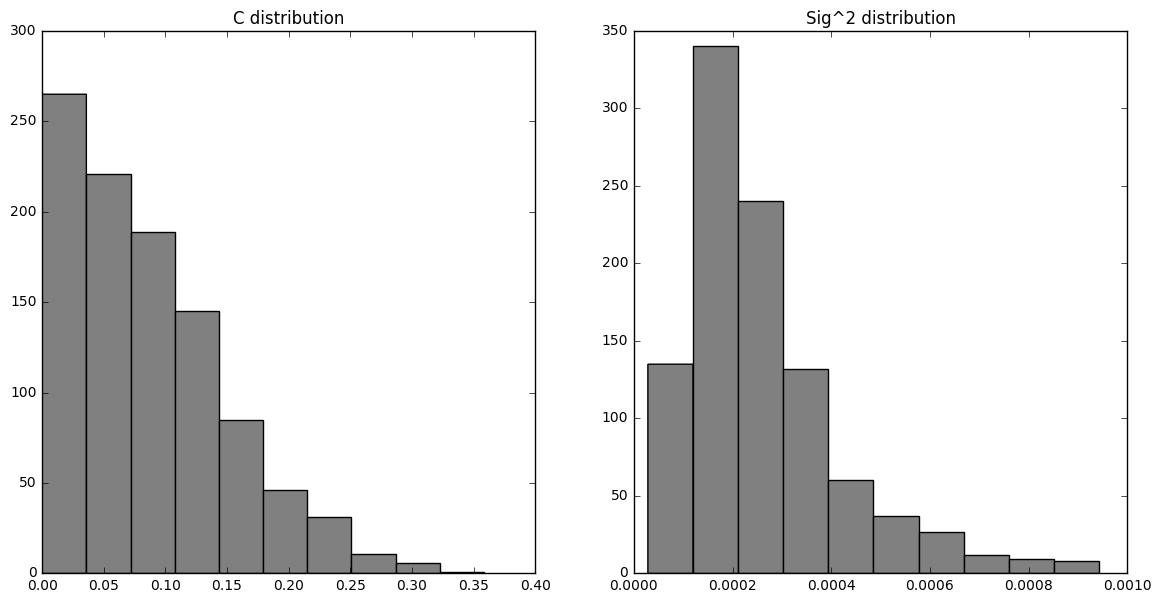

In [4]:
elm.summarize()

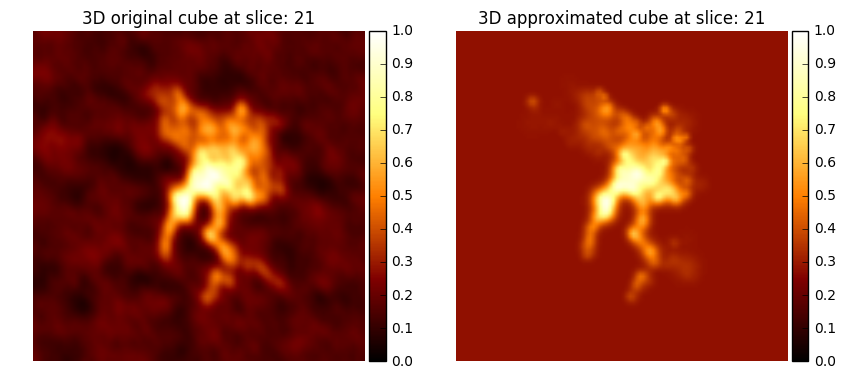

In [5]:
# visualization of solution
xc, yc, zc, c, sig = elm.get_params_mapped()
u_sol = compute_solution(c, sig, xc, yc, zc, dims=elm.dims)
interact(comparative_slices_plot, data1=fixed(elm.data), data2=fixed(u_sol+elm.base_level), slc=(0, elm.dims[0]-1))

In [6]:
# gaussian agglomeration
xc, yc, zc, c, sig = elm.get_params_mapped()
mu = np.vstack([xc, yc, zc]).T

components_dict = gaussian_reduction(c, mu, sig, n_comp=1)

Merged components 287 and 611 with 1.34316113787e-10 dissimilarity
Merged components 200 and 609 with 1.6886809621e-09 dissimilarity
Merged components 734 and 857 with 4.2023669568e-07 dissimilarity
Merged components 547 and 776 with 6.30771097576e-07 dissimilarity
Merged components 508 and 628 with 1.51437261465e-06 dissimilarity
Merged components 898 and 994 with 1.32688897738e-05 dissimilarity
Merged components 134 and 261 with 3.08416200309e-05 dissimilarity
Merged components 48 and 166 with 5.010663087e-05 dissimilarity
Merged components 135 and 495 with 7.55807948785e-05 dissimilarity
Merged components 457 and 683 with 8.75550122773e-05 dissimilarity
Merged components 768 and 902 with 9.45258634258e-05 dissimilarity
Merged components 670 and 783 with 9.49779822107e-05 dissimilarity
Merged components 411 and 670 with 9.76386525941e-05 dissimilarity
Merged components 136 and 290 with 0.000111713546046 dissimilarity
Merged components 239 and 953 with 0.000136549252648 dissimilarity


0.335775130142
0.57651213278


0.335775130142
0.610405778233


0.335775130142
0.595177430709


0.335775130142
0.692692247037


0.335775130142
0.391596913998


0.335775130142
0.779325357452




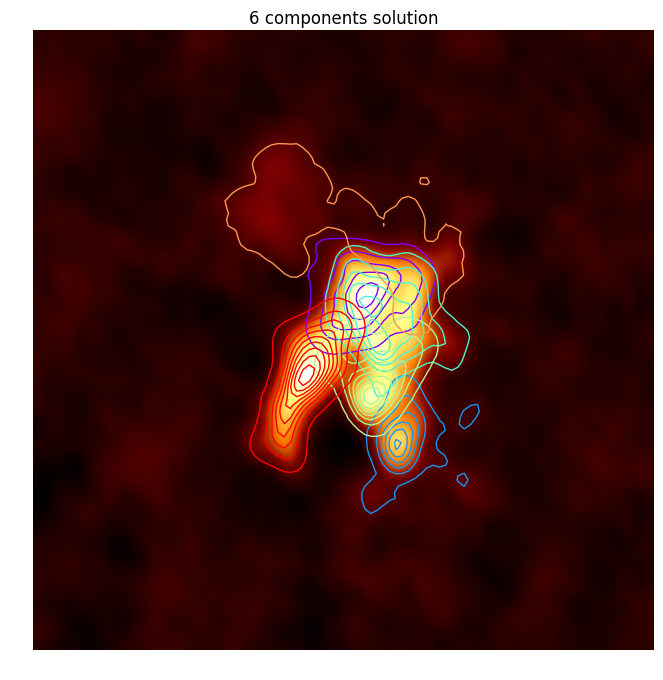

In [28]:
# get all the (mapped) parameters
n_comp = 6
n_levels = 20
xc, yc, zc, c, sig = elm.get_params_mapped()

# generating the evaluation points
_xe = np.linspace(0., 1., elm.dims[0]+2)[1:-1]
_ye = np.linspace(0., 1., elm.dims[1]+2)[1:-1]
_ze = np.linspace(0., 1., elm.dims[2]+2)[1:-1]
len_xe = len(_xe); len_ye = len(_ye); len_ze = len(_ze)
Xe,Ye,Ze = np.meshgrid(_xe, _ye, _ze, sparse=False, indexing='ij')
xe = Xe.ravel(); ye = Ye.ravel(); ze = Ze.ravel()  

plt.figure(figsize=(8,8))
plt.title('{0} components solution'.format(n_comp))
plt.axis('off')
ax = plt.subplot(1,1,1)
# stacked data
_data = elm.data.sum(axis=0)
dmin = _data.min(); dmax = _data.max()
_data -= dmin
_data /= dmax
base_level = estimate_rms(_data)
ax.imshow(_data, cmap=plt.cm.afmhot)
color = plt.cm.rainbow(np.linspace(0., 1., n_comp))
levels = np.linspace(0., 0.95, n_levels)

for i,indexes in enumerate(components_dict[n_comp]):
    _xc = xc[indexes]
    _yc = yc[indexes]
    _zc = zc[indexes]
    _c = c[indexes]
    _sig = sig[indexes]
    u = u_eval(_c, _sig, _xc, _yc, _zc, xe, ye, ze, support=elm.support) + elm.base_level
    _u = u.reshape(len_xe, len_ye, len_ze).sum(axis=0)
    _u -= dmin; _u /= dmax

    print(np.min(_u))
    print(np.max(_u))
    print("\n")
    ax.contour(_u, levels=levels, colors=[color[i]])
    #plt.subplot(n_comp,1, i+1)
    #ax = plt.gca()
    #im = ax.imshow(_u, vmin=0., vmax=1.)
    #plt.axis('off')
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    #plt.colorbar(im, cax=cax)
plt.show()